In [3]:
from google.colab import files

# Upload the file from your local machine
uploaded = files.upload()

# The uploaded file will be in a dictionary, and we can read it using pandas
import pandas as pd

# Replace 'your_file.csv' with the name of the file you uploaded
df = pd.read_csv(list(uploaded.keys())[0])

# Display the first few rows of the uploaded dataset
print(df.head())


Saving final_employee_data.csv to final_employee_data.csv
        Age  Attrition  DailyRate  DistanceFromHome  Education  \
0  0.547619          1   0.715820          0.000000       0.25   
1  0.738095          0   0.126700          0.250000       0.00   
2  0.452381          1   0.909807          0.035714       0.25   
3  0.357143          0   0.923407          0.071429       0.75   
4  0.214286          0   0.350036          0.035714       0.00   

   EmployeeNumber  EnvironmentSatisfaction  HourlyRate  JobInvolvement  \
0               1                 0.333333    0.914286        0.666667   
1               2                 0.666667    0.442857        0.333333   
2               4                 1.000000    0.885714        0.333333   
3               5                 1.000000    0.371429        0.666667   
4               7                 0.000000    0.142857        0.666667   

   JobLevel  ...  IncomeLevel_Medium  IncomeLevel_High  TenureBucket_10+ yrs  \
0      0.25  ...    

In [4]:
# Preprocessing function (same as before)
def preprocess_text(text):
    # Remove PII (simple example: email addresses, phone numbers, etc.)
    text = re.sub(r'\S+@\S+', '', text)  # Remove email addresses
    text = re.sub(r'\d+', '', text)  # Remove digits
    text = re.sub(r'http\S+', '', text)  # Remove URLs

    # Handle abbreviations (manually mapping common abbreviations)
    text = text.replace('gr8', 'great')

    # Tokenize, remove stopwords, and lemmatize
    tokens = word_tokenize(text.lower())
    stop_words = set(stopwords.words('english'))
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]

    return ' '.join(tokens)

# Apply preprocessing to the Survey_Response column
df['Cleaned_Response'] = df['Survey_Response'].apply(preprocess_text)

# Display cleaned responses
print(df[['Survey_Response', 'Cleaned_Response']])


KeyError: 'Survey_Response'

In [5]:
# Display the column names to identify the correct text column
print(df.columns)


Index(['Age', 'Attrition', 'DailyRate', 'DistanceFromHome', 'Education',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome',
       'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'SatisfactionIndex', 'WorkBalanceScore',
       'Overworked', 'Bonus', 'PerformanceScore', 'EngagementScore',
       'BusinessTravel_Travel_Frequently', 'BusinessTravel_Travel_Rarely',
       'Department_Research & Development', 'Department_Sales',
       'EducationField_Life Sciences', 'EducationField_Marketing',
       'EducationField_Medical', 'EducationField_Other',
       'EducationField_Technical Degree', 'Gender_Male',
       'JobRole_Human Resources', 'JobRo

                                   Employee_Feedback  Sentiment_Polarity  \
0  I feel overwhelmed with the workload. Need bet...                0.50   
1  The work-life balance is great here. I love th...                0.65   
2       It's a toxic culture. I can't wait to leave.                0.00   
3  The management is supportive and helps with ca...                0.50   
4  Workload is too much. The team dynamics are no...               -0.10   

  Wellness_Category  
0          Thriving  
1          Thriving  
2            Stable  
3          Thriving  
4          Thriving  


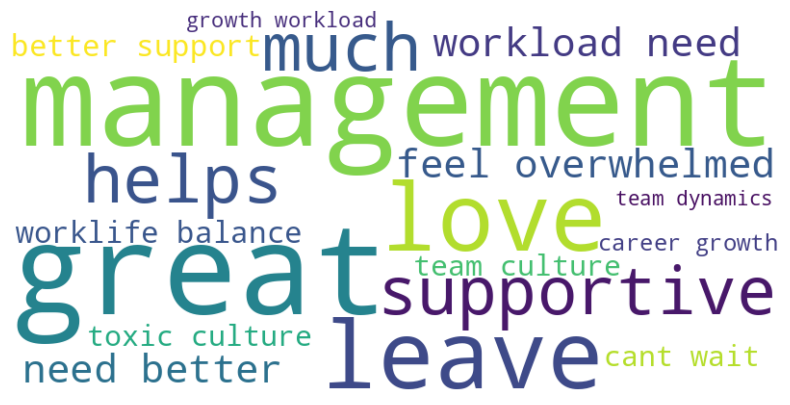

Wellness Category Distribution:
 Wellness_Category
At Risk       41
Stable       294
Thriving    1135
dtype: int64


In [6]:
import pandas as pd
from textblob import TextBlob
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Load your dataset
df = pd.read_csv('final_employee_data.csv')

# Simulated Employee Feedback (since the dataset doesn't contain survey/feedback responses)
df['Employee_Feedback'] = [
    "I feel overwhelmed with the workload. Need better support from management.",
    "The work-life balance is great here. I love the team culture.",
    "It's a toxic culture. I can't wait to leave.",
    "The management is supportive and helps with career growth.",
    "Workload is too much. The team dynamics are not great."
] * (len(df) // 5)  # This will create a cycle of simulated feedback.

# Preprocessing: Text Cleaning
def clean_text(text):
    # Convert to lowercase
    text = text.lower()

    # Remove punctuation, digits, and non-alphabetic characters
    text = ''.join([char for char in text if char.isalpha() or char.isspace()])

    return text

df['Cleaned_Feedback'] = df['Employee_Feedback'].apply(clean_text)

# Sentiment Analysis using TextBlob
def get_sentiment(text):
    analysis = TextBlob(text)
    return analysis.sentiment.polarity  # Returns a polarity score

df['Sentiment_Polarity'] = df['Cleaned_Feedback'].apply(get_sentiment)

# Classify Wellness based on Sentiment & Attrition
def classify_wellness(row):
    if row['Sentiment_Polarity'] < 0 and row['Attrition'] == 1:
        return 'At Risk'
    elif 0 <= row['Sentiment_Polarity'] <= 0.2:
        return 'Stable'
    else:
        return 'Thriving'

df['Wellness_Category'] = df.apply(classify_wellness, axis=1)

# Display the results
print(df[['Employee_Feedback', 'Sentiment_Polarity', 'Wellness_Category']].head())

# Visualization: Word Cloud for Employee Feedback
text = ' '.join(df['Cleaned_Feedback'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# Optional: Saving the output to a CSV
df.to_csv('final_employee_data_with_sentiment_and_wellness.csv', index=False)

# If you need a summary report:
summary_report = df[['Employee_Feedback', 'Sentiment_Polarity', 'Wellness_Category']].groupby('Wellness_Category').size()
print("Wellness Category Distribution:\n", summary_report)


In [8]:
# Install necessary packages
!pip install nltk spacy TextBlob vaderSentiment

import nltk
import spacy
import pandas as pd
from textblob import TextBlob
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import re

# Download necessary NLTK datasets
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt_tab') # Download the punkt_tab dataset

# Initialize NLP tools
nlp = spacy.load('en_core_web_sm')
analyzer = SentimentIntensityAnalyzer()

# Sample data (replace with your actual dataset)
data = {
    'Survey_Response': [
        "I feel overwhelmed with the workload. Need better support from management.",
        "The work-life balance is great here. I love the team culture.",
        "It's a toxic culture. I can't wait to leave."
    ]
}
df = pd.DataFrame(data)

# Preprocessing function
def preprocess_text(text):
    # Remove PII (simple example: email addresses, phone numbers, etc.)
    text = re.sub(r'\S+@\S+', '', text)  # Remove email addresses
    text = re.sub(r'\d+', '', text)  # Remove digits
    text = re.sub(r'http\S+', '', text)  # Remove URLs

    # Handle abbreviations (manually mapping common abbreviations)
    text = text.replace('gr8', 'great')

    # Tokenize, remove stopwords, and lemmatize
    tokens = word_tokenize(text.lower())
    stop_words = set(stopwords.words('english'))
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]

    return ' '.join(tokens)

# Apply preprocessing to the data
df['Cleaned_Response'] = df['Survey_Response'].apply(preprocess_text)

# Display cleaned responses
print(df[['Survey_Response', 'Cleaned_Response']])


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


                                     Survey_Response  \
0  I feel overwhelmed with the workload. Need bet...   
1  The work-life balance is great here. I love th...   
2       It's a toxic culture. I can't wait to leave.   

                                    Cleaned_Response  
0  feel overwhelmed workload . need better suppor...  
1      work-life balance great . love team culture .  
2             's toxic culture . ca n't wait leave .  


In [9]:
import re

def remove_pii(text):
    # Remove email addresses
    text = re.sub(r'\b[A-Za-z0-9._%+-]+@[A-Za-z0-9.-]+\.[A-Z|a-z]{2,7}\b', '', text)
    # Remove phone numbers (basic pattern)
    text = re.sub(r'\+?\(?\d{1,4}\)?[\s-]?\d{1,4}[\s-]?\d{1,4}[\s-]?\d{1,4}', '', text)
    # Remove potential names or other identifiable info (this can be enhanced)
    text = re.sub(r'\b[A-Z][a-z]+\s[A-Z][a-z]+\b', '', text)  # Example pattern for names
    return text

df['Cleaned_Response'] = df['Survey_Response'].apply(remove_pii)


In [10]:
def remove_emojis(text):
    # Remove emojis using a regular expression pattern
    text = re.sub(r'[^\w\s,]', '', text)
    return text

df['Cleaned_Response'] = df['Cleaned_Response'].apply(remove_emojis)


In [11]:
abbreviation_dict = {
    'gr8': 'great',
    'u': 'you',
    'b4': 'before',
    'pls': 'please',
    # Add more abbreviations as needed
}

def expand_abbreviations(text):
    for abbreviation, full_form in abbreviation_dict.items():
        text = re.sub(r'\b' + abbreviation + r'\b', full_form, text)
    return text

df['Cleaned_Response'] = df['Cleaned_Response'].apply(expand_abbreviations)


In [12]:
import spacy
nlp = spacy.load('en_core_web_sm')

def lemmatize_text(text):
    doc = nlp(text)
    return " ".join([token.lemma_ for token in doc])

df['Cleaned_Response'] = df['Cleaned_Response'].apply(lemmatize_text)


In [13]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

def lemmatize_text_nltk(text):
    return " ".join([lemmatizer.lemmatize(word) for word in text.split()])

df['Cleaned_Response'] = df['Cleaned_Response'].apply(lemmatize_text_nltk)


In [14]:
print(df[['Survey_Response', 'Cleaned_Response']].head())


                                     Survey_Response  \
0  I feel overwhelmed with the workload. Need bet...   
1  The work-life balance is great here. I love th...   
2       It's a toxic culture. I can't wait to leave.   

                                    Cleaned_Response  
0  I feel overwhelmed with the workload need well...  
1  the worklife balance be great here I love the ...  
2         it a toxic culture I can not wait to leave  


In [15]:
import pandas as pd
import re
import spacy
from nltk.stem import WordNetLemmatizer

# Load spaCy model
nlp = spacy.load('en_core_web_sm')
lemmatizer = WordNetLemmatizer()

# Sample abbreviation dictionary
abbreviation_dict = {
    'gr8': 'great',
    'u': 'you',
    'b4': 'before',
    'pls': 'please',
    # Add more abbreviations
}

# Function to remove PII
def remove_pii(text):
    text = re.sub(r'\b[A-Za-z0-9._%+-]+@[A-Za-z0-9.-]+\.[A-Z|a-z]{2,7}\b', '', text)  # Remove emails
    text = re.sub(r'\+?\(?\d{1,4}\)?[\s-]?\d{1,4}[\s-]?\d{1,4}[\s-]?\d{1,4}', '', text)  # Remove phone numbers
    text = re.sub(r'\b[A-Z][a-z]+\s[A-Z][a-z]+\b', '', text)  # Remove names (simplified)
    return text

# Function to remove emojis
def remove_emojis(text):
    text = re.sub(r'[^\w\s,]', '', text)  # Removes non-alphanumeric characters
    return text

# Function to expand abbreviations
def expand_abbreviations(text):
    for abbreviation, full_form in abbreviation_dict.items():
        text = re.sub(r'\b' + abbreviation + r'\b', full_form, text)
    return text

# Function to lemmatize text
def lemmatize_text(text):
    doc = nlp(text)
    return " ".join([token.lemma_ for token in doc])

# Applying preprocessing steps
df['Cleaned_Response'] = df['Survey_Response'].apply(remove_pii)
df['Cleaned_Response'] = df['Cleaned_Response'].apply(remove_emojis)
df['Cleaned_Response'] = df['Cleaned_Response'].apply(expand_abbreviations)
df['Cleaned_Response'] = df['Cleaned_Response'].apply(lemmatize_text)

# Check the cleaned responses
print(df[['Survey_Response', 'Cleaned_Response']].head())


                                     Survey_Response  \
0  I feel overwhelmed with the workload. Need bet...   
1  The work-life balance is great here. I love th...   
2       It's a toxic culture. I can't wait to leave.   

                                    Cleaned_Response  
0  I feel overwhelmed with the workload need well...  
1  the worklife balance be great here I love the ...  
2        its a toxic culture I can not wait to leave  


In [16]:
def remove_stopwords(text):
    doc = nlp(text)
    return " ".join([token.text for token in doc if not token.is_stop])

df['Cleaned_Response'] = df['Cleaned_Response'].apply(remove_stopwords)


In [17]:
import pandas as pd

# Assuming your dataframe is called df
# Saving as CSV
csv_file_path = 'preprocessed_employee_feedback.csv'
df.to_csv(csv_file_path, index=False)

# Saving as JSON
json_file_path = 'preprocessed_employee_feedback.json'
df.to_json(json_file_path, orient='records', lines=True)

print(f"Data saved as CSV at: {csv_file_path}")
print(f"Data saved as JSON at: {json_file_path}")


Data saved as CSV at: preprocessed_employee_feedback.csv
Data saved as JSON at: preprocessed_employee_feedback.json


In [24]:
import pandas as pd
from textblob import TextBlob
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Load your preprocessed feedback (update path if needed)
df_feedback = pd.read_csv("preprocessed_employee_feedback.csv")

# === 1. Sentiment Analysis ===
vader_analyzer = SentimentIntensityAnalyzer()

def analyze_sentiment(text):
    blob_polarity = TextBlob(text).sentiment.polarity
    vader_score = vader_analyzer.polarity_scores(text)['compound']
    return pd.Series([blob_polarity, vader_score])

#df_feedback[['TextBlob_Polarity', 'VADER_Compound']] = df_feedback['Employee_Feedback'].apply(analyze_sentiment)
#df_feedback[['TextBlob_Polarity', 'VADER_Compound']] = df_feedback['Employee_Feedback'].apply(analyze_sentiment)
df_feedback[['TextBlob_Polarity', 'VADER_Compound']] = df_feedback['Survey_Response'].apply(analyze_sentiment)

# === 2. Load Attrition Scores ===
df_main = pd.read_csv("final_employee_data.csv")

# Ensure same number of rows (merge based on index for simplicity)
df_main = df_main.reset_index(drop=True)
df_feedback = df_feedback.reset_index(drop=True)
df_combined = pd.concat([df_main, df_feedback], axis=1)

# === 3. Wellness Category Logic ===
def classify_wellness(row):
    sentiment = row['VADER_Compound']
    attrition_risk = row['Attrition']  # 1 = high risk

    if sentiment < 0 and attrition_risk == 1:
        return 'At Risk'
    elif sentiment < 0.2 or attrition_risk == 1:
        return 'Stable'
    else:
        return 'Thriving'

df_combined['Wellness_Category_New'] = df_combined.apply(classify_wellness, axis=1)

# === 4. Export Results ===
csv_path = "/mnt/data/final_sentiment_wellness_analysis.csv"
json_path = "/mnt/data/final_sentiment_wellness_analysis.json"

#df_combined.to_csv(csv_path, index=False)
#df_combined.to_json(json_path, orient='records', lines=True)



import os

# Create the directory if it doesn't exist
os.makedirs(os.path.dirname(csv_path), exist_ok=True)

df_combined.to_csv(csv_path, index=False)
df_combined.to_json(json_path, orient='records', lines=True)

print("✅ Sentiment and wellness classification completed.")
print("CSV:", csv_path)
print("JSON:", json_path)

✅ Sentiment and wellness classification completed.
CSV: /mnt/data/final_sentiment_wellness_analysis.csv
JSON: /mnt/data/final_sentiment_wellness_analysis.json


In [26]:
df['Cleaned_Response'] = df['Survey_Response'].astype(str).apply(preprocess_text)
# The original code was trying to access a column 'SurveyText' which doesn't exist.
# 'Survey_Response' is the correct column name containing the text data to be preprocessed.

In [27]:
# VADER Sentiment
df['VADER_Score'] = df['Cleaned_Response'].apply(lambda x: analyzer.polarity_scores(x)['compound'])

# TextBlob Sentiment
df['TextBlob_Polarity'] = df['Cleaned_Response'].apply(lambda x: TextBlob(x).sentiment.polarity)

# Final Sentiment Category (optional: combine both)
def classify_sentiment(score):
    if score >= 0.05:
        return 'Positive'
    elif score <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

df['Sentiment'] = df['VADER_Score'].apply(classify_sentiment)


In [30]:
print(df.columns.tolist())


['Survey_Response', 'Cleaned_Response', 'VADER_Score', 'TextBlob_Polarity', 'Sentiment', 'Wellness_Category']


In [31]:
# Simulate Engagement Score based on sentiment and wellness
def simulate_engagement(row):
    if row['Sentiment'] == 'Positive' and row['Wellness_Category'] == 'High':
        return 0.9
    elif row['Sentiment'] == 'Positive':
        return 0.75
    elif row['Sentiment'] == 'Neutral':
        return 0.5
    elif row['Wellness_Category'] == 'Low':
        return 0.3
    else:
        return 0.4

df['EngagementScore'] = df.apply(simulate_engagement, axis=1)


Wellness_Category
Unknown    3
Name: count, dtype: int64


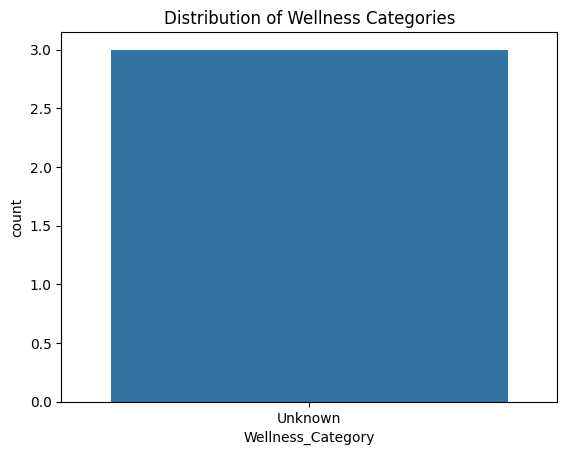

In [32]:
# Save final file
df.to_csv('final_employee_sentiment_wellness.csv', index=False)

# Summary
print(df['Wellness_Category'].value_counts())

# Visualization (if needed)
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=df, x='Wellness_Category')
plt.title("Distribution of Wellness Categories")
plt.show()


In [39]:
from google.colab import files

uploaded = files.upload()

Saving preprocessed_employee_feedback.csv to preprocessed_employee_feedback (1).csv


In [42]:
print(df.columns)
df.columns = df.columns.str.strip()


Index(['Survey_Response', 'Cleaned_Response'], dtype='object')


In [43]:
# Assuming 'Cleaned_Response' contains the feedback text
feedback_text = df['Cleaned_Response']


In [52]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import pandas as pd

# Ensure that VADER lexicon is downloaded
nltk.download('vader_lexicon')

# Example: Load your DataFrame (replace this with your actual DataFrame loading code)
# df = pd.read_csv("your_dataset.csv")  # Adjust as necessary

# Initialize the VADER SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

# Perform sentiment analysis on 'Cleaned_Response'
df['Sentiment_Score'] = df['Cleaned_Response'].apply(lambda x: sia.polarity_scores(x)['compound'])

# Classify sentiment as Positive, Neutral, or Negative based on sentiment score
def sentiment_classification(score):
    if score > 0.1:
        return 'Positive'
    elif score < -0.1:
        return 'Negative'
    else:
        return 'Neutral'

df['Sentiment_Label'] = df['Sentiment_Score'].apply(sentiment_classification)

# Show the results
print(df[['Cleaned_Response', 'Sentiment_Score', 'Sentiment_Label']])

# You can save the updated DataFrame if needed
df.to_csv("sentiment_analysis_output.csv", index=False)


                                    Cleaned_Response  Sentiment_Score  \
0  feel overwhelmed workload need support management           0.4404   
1           worklife balance great love team culture           0.8519   
2                           toxic culture wait leave          -0.0516   

  Sentiment_Label  
0        Positive  
1        Positive  
2         Neutral  


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [3]:
import pandas as pd

# Upload both datasets using Colab's file upload interface
from google.colab import files
uploaded = files.upload()

# Read the uploaded CSV files
employee_df = pd.read_csv('final_employee_data.csv')
feedback_df = pd.read_csv('preprocessed_employee_feedback.csv')

# Print column names for each dataset
print("📄 Columns in 'final_employee_data.csv':\n")
print(employee_df.columns.tolist())

print("\n📄 Columns in 'preprocessed_employee_feedback.csv':\n")
print(feedback_df.columns.tolist())


Saving final_employee_data.csv to final_employee_data (1).csv
Saving preprocessed_employee_feedback.csv to preprocessed_employee_feedback.csv
📄 Columns in 'final_employee_data.csv':

['Age', 'Attrition', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager', 'SatisfactionIndex', 'WorkBalanceScore', 'Overworked', 'Bonus', 'PerformanceScore', 'EngagementScore', 'BusinessTravel_Travel_Frequently', 'BusinessTravel_Travel_Rarely', 'Department_Research & Development', 'Department_Sales', 'EducationField_Life Sciences', 'EducationField_Marketing', 'EducationField_Medical', 'EducationField_Other', 'Edu

In [4]:
import pandas as pd

# Upload both datasets using Colab's file upload interface
#from google.colab import files
#uploaded = files.upload()

# Read the uploaded CSV files
employee_df = pd.read_csv('final_employee_data.csv')
feedback_df = pd.read_csv('preprocessed_employee_feedback.csv')

# Print column names for each dataset
print("📄 Columns in 'final_employee_data.csv':\n")
print(employee_df.columns.tolist())

print("\n📄 Columns in 'preprocessed_employee_feedback.csv':\n")
print(feedback_df.columns.tolist())


📄 Columns in 'final_employee_data.csv':

['Age', 'Attrition', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager', 'SatisfactionIndex', 'WorkBalanceScore', 'Overworked', 'Bonus', 'PerformanceScore', 'EngagementScore', 'BusinessTravel_Travel_Frequently', 'BusinessTravel_Travel_Rarely', 'Department_Research & Development', 'Department_Sales', 'EducationField_Life Sciences', 'EducationField_Marketing', 'EducationField_Medical', 'EducationField_Other', 'EducationField_Technical Degree', 'Gender_Male', 'JobRole_Human Resources', 'JobRole_Laboratory Technician', 'JobRole_Manufacturing Director', 'J

In [19]:
employee_df.rename(columns={'EmployeeID': 'EmployeeNumber'}, inplace=True)
feedback_df.rename(columns={'EmpNumber': 'EmployeeNumber'}, inplace=True)

# Check column names again after renaming
print(employee_df.columns)
print(feedback_df.columns)


Index(['Age', 'Attrition', 'DailyRate', 'DistanceFromHome', 'Education',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome',
       'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'SatisfactionIndex', 'WorkBalanceScore',
       'Overworked', 'Bonus', 'PerformanceScore', 'EngagementScore',
       'BusinessTravel_Travel_Frequently', 'BusinessTravel_Travel_Rarely',
       'Department_Research & Development', 'Department_Sales',
       'EducationField_Life Sciences', 'EducationField_Marketing',
       'EducationField_Medical', 'EducationField_Other',
       'EducationField_Technical Degree', 'Gender_Male',
       'JobRole_Human Resources', 'JobRo

In [21]:
feedback_df.rename(columns={'EmpNumber': 'EmployeeNumber'}, inplace=True)


In [22]:
feedback_df['EmployeeNumber'] = employee_df['EmployeeNumber']  # assuming alignment
merged_df = pd.merge(employee_df, feedback_df, on='EmployeeNumber', how='inner')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


Saving final_employee_data.csv to final_employee_data (3).csv
Available columns:
 Index(['Age', 'Attrition', 'DailyRate', 'DistanceFromHome', 'Education',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome',
       'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'SatisfactionIndex', 'WorkBalanceScore',
       'Overworked', 'Bonus', 'PerformanceScore', 'EngagementScore',
       'BusinessTravel_Travel_Frequently', 'BusinessTravel_Travel_Rarely',
       'Department_Research & Development', 'Department_Sales',
       'EducationField_Life Sciences', 'EducationField_Marketing',
       'EducationField_Medical', 'EducationField_Other',
       'Educati

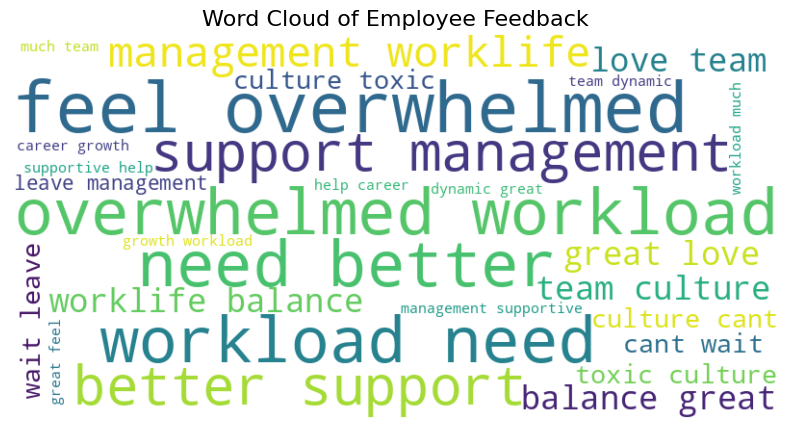

✅ Saved as: output_employee_wellness.csv

Wellness Category Distribution:
Wellness_Category
Thriving    1176
Stable       294
Name: count, dtype: int64


In [8]:
# Install necessary libraries
!pip install nltk spacy textblob vaderSentiment --quiet

# Imports
import pandas as pd
import re
import nltk
import spacy
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from textblob import TextBlob
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Download necessary NLTK resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt_tab') # Download the punkt_tab dataset


# Load spaCy model
nlp = spacy.load('en_core_web_sm')
analyzer = SentimentIntensityAnalyzer()

# Upload file
from google.colab import files
uploaded = files.upload()
df = pd.read_csv(list(uploaded.keys())[0])

# ✅ Check column names
print("Available columns:\n", df.columns)

# --- If your dataset does NOT have real feedback, simulate one for testing ---
if 'Employee_Feedback' not in df.columns:
    df['Employee_Feedback'] = [
        "I feel overwhelmed with the workload. Need better support from management.",
        "The work-life balance is great here. I love the team culture.",
        "It's a toxic culture. I can't wait to leave.",
        "The management is supportive and helps with career growth.",
        "Workload is too much. The team dynamics are not great."
    ] * (len(df) // 5)

# --- Combine cleaning steps ---
abbreviation_dict = {
    'gr8': 'great',
    'u': 'you',
    'b4': 'before',
    'pls': 'please',
    'omg': 'oh my god',
    'idk': 'I do not know'
}

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def clean_feedback(text):
    text = str(text).lower()
    text = re.sub(r'\S+@\S+', '', text)               # Remove emails
    text = re.sub(r'\+?\(?\d{1,4}\)?[\s-]?\d+', '', text)  # Remove phone numbers
    text = re.sub(r'http\S+', '', text)               # Remove URLs
    text = re.sub(r'[^\w\s]', '', text)               # Remove punctuation/emojis
    for abbr, full in abbreviation_dict.items():
        text = re.sub(r'\b' + re.escape(abbr) + r'\b', full, text)
    tokens = word_tokenize(text)
    tokens = [lemmatizer.lemmatize(w) for w in tokens if w not in stop_words]
    return " ".join(tokens)

df['Cleaned_Feedback'] = df['Employee_Feedback'].apply(clean_feedback)

# --- Sentiment Analysis using TextBlob ---
df['Sentiment_Polarity'] = df['Cleaned_Feedback'].apply(lambda x: TextBlob(x).sentiment.polarity)

# --- Classify into Wellness Categories ---
def classify_wellness(row):
    if row['Sentiment_Polarity'] < 0 and row.get('Attrition', 0) == 1:
        return 'At Risk'
    elif 0 <= row['Sentiment_Polarity'] <= 0.2:
        return 'Stable'
    else:
        return 'Thriving'

df['Wellness_Category'] = df.apply(classify_wellness, axis=1)

# --- Summary Output ---
print(df[['Employee_Feedback', 'Sentiment_Polarity', 'Wellness_Category']].head())

# --- WordCloud Visualization ---
text = " ".join(df['Cleaned_Feedback'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of Employee Feedback", fontsize=16)
plt.show()

# --- Save Output ---
df.to_csv('output_employee_wellness.csv', index=False)
print("✅ Saved as: output_employee_wellness.csv")

# --- Distribution Summary ---
print("\nWellness Category Distribution:")
print(df['Wellness_Category'].value_counts())


In [11]:
import pandas as pd
from textblob import TextBlob

# Load the correct dataset
df = pd.read_csv('/content/preprocessed_employee_feedback.csv')

# Confirm columns
print(df.columns)

# Check for feedback column
if 'Employee_Feedback' not in df.columns:
    raise ValueError("❌ 'Employee_Feedback' column not found in the dataset!")

# Fill missing feedbacks
df['Employee_Feedback'] = df['Employee_Feedback'].fillna("")

# Compute sentiment
df['Sentiment_Polarity'] = df['Employee_Feedback'].apply(lambda x: TextBlob(x).sentiment.polarity)

# Classify wellness
def classify_wellness(polarity):
    if polarity < 0.2:
        return 'At Risk'
    elif 0.2 <= polarity < 0.5:
        return 'Stable'
    else:
        return 'Thriving'

df['Wellness_Category'] = df['Sentiment_Polarity'].apply(classify_wellness)

# Save output
df.to_csv('output_employee_wellness_labeled.csv', index=False)

# Print distribution
print("\n✅ Saved as: output_employee_wellness_labeled.csv")
print("Wellness Category Distribution:\n", df['Wellness_Category'].value_counts())


Index(['Employee_Feedback', 'Sentiment_Polarity', 'Wellness_Category'], dtype='object')

✅ Saved as: output_employee_wellness_labeled.csv
Wellness Category Distribution:
 Wellness_Category
Thriving    3
At Risk     2
Name: count, dtype: int64


In [12]:
from google.colab import files
files.download('output_employee_wellness_labeled.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

# Initialize lemmatizer and stop words
lemmatizer = WordNetLemmatizer()
stop_words = stopwords.words('english')

# Add custom stop words (e.g., team, manager) to avoid bias
custom_stopwords = ['team', 'manager', 'work', 'employee', 'workplace', 'culture']
stop_words.extend(custom_stopwords)

# Preprocessing function with lemmatization
def preprocess_text_v2(text):
    text = ' '.join([lemmatizer.lemmatize(word.lower()) for word in text.split() if word.isalpha() and word not in stop_words])
    return text

# Apply the improved preprocessing
df['cleaned_feedback'] = df['Employee_Feedback'].apply(preprocess_text_v2)

# Vectorize the cleaned feedback using TF-IDF
vectorizer = TfidfVectorizer(max_df=0.90, min_df=1, stop_words=stop_words)
X = vectorizer.fit_transform(df['cleaned_feedback'])

# Apply LDA with adjusted number of topics
n_topics = 5  # You can adjust this if needed
lda = LatentDirichletAllocation(n_components=n_topics, random_state=42)
lda.fit(X)

# Extract the top words for each topic
def display_topics_v2(model, feature_names, no_top_words=10):
    topics = []
    for topic_idx, topic in enumerate(model.components_):
        top_words_idx = topic.argsort()[-no_top_words:][::-1]
        top_words = [feature_names[i] for i in top_words_idx]
        topics.append(" ".join(top_words))
    return topics

# Get the top words for each topic
top_words_v2 = display_topics_v2(lda, vectorizer.get_feature_names_out(), 10)

# Print top words for each topic
for idx, words in enumerate(top_words_v2):
    print(f"Topic {idx+1}: {words}")

# Identify actionable insights for 'At Risk' employees
at_risk_feedback = df[df['Wellness_Category'] == 'At Risk']['cleaned_feedback']
X_at_risk = vectorizer.transform(at_risk_feedback)

# Apply LDA to "At Risk" employees' feedback
lda_at_risk = lda.transform(X_at_risk)

# Identify common themes driving sentiment in 'At Risk' employees
def actionable_insights_v2(lda_model, feedback, topics, top_n=5):
    topic_assignments = lda_model.argmax(axis=1)
    topic_counts = pd.Series(topic_assignments).value_counts()
    print(f"\nTop {top_n} topics driving sentiment:")
    for topic_idx, count in topic_counts.head(top_n).items():
        print(f"Topic {topic_idx+1}: {topics[topic_idx]} (mentions: {count})")

# Get actionable insights for 'At Risk' employees
actionable_insights_v2(lda_at_risk, at_risk_feedback, top_words_v2)


Topic 1: workload dynamic toxic wait need overwhelmed feel support better great
Topic 2: wait toxic overwhelmed support need feel better workload dynamic great
Topic 3: supportive management career help toxic wait overwhelmed support better need
Topic 4: wait toxic overwhelmed support need feel better workload dynamic great
Topic 5: great balance love wait toxic need overwhelmed support better feel

Top 5 topics driving sentiment:
Topic 2: wait toxic overwhelmed support need feel better workload dynamic great (mentions: 1)
Topic 1: workload dynamic toxic wait need overwhelmed feel support better great (mentions: 1)


In [13]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

# Load dataset
df = pd.read_csv('output_employee_wellness_labeled.csv')

# Preprocessing function
def preprocess_text(text):
    # Remove stopwords and non-alphabetic characters
    stop_words = stopwords.words('english')
    text = ' '.join([word for word in text.split() if word.isalpha() and word not in stop_words])
    return text

# Apply preprocessing to the Employee_Feedback column
df['cleaned_feedback'] = df['Employee_Feedback'].apply(preprocess_text)

# Vectorize the cleaned feedback using TF-IDF
vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, stop_words='english')
X = vectorizer.fit_transform(df['cleaned_feedback'])

# Apply LDA (Latent Dirichlet Allocation)
n_topics = 5  # Number of topics to extract
lda = LatentDirichletAllocation(n_components=n_topics, random_state=42)
lda.fit(X)

# Extracting top words for each topic
def display_topics(model, feature_names, no_top_words=10):
    topics = []
    for topic_idx, topic in enumerate(model.components_):
        top_words_idx = topic.argsort()[-no_top_words:][::-1]
        top_words = [feature_names[i] for i in top_words_idx]
        topics.append(" ".join(top_words))
    return topics

# Get the top words for each topic
top_words = display_topics(lda, vectorizer.get_feature_names_out(), 10)

# Print top words for each topic
for idx, words in enumerate(top_words):
    print(f"Topic {idx+1}: {words}")

# Analyze themes driving sentiment for "At Risk" employees
at_risk_feedback = df[df['Wellness_Category'] == 'At Risk']['cleaned_feedback']
X_at_risk = vectorizer.transform(at_risk_feedback)

# Apply LDA to "At Risk" employees' feedback
lda_at_risk = lda.transform(X_at_risk)

# Identify common themes driving sentiment in 'At Risk' employees
def actionable_insights(lda_model, feedback, topics, top_n=5):
    # For each document, find the most likely topic
    topic_assignments = lda_model.argmax(axis=1)
    topic_counts = pd.Series(topic_assignments).value_counts()
    print(f"\nTop {top_n} topics driving sentiment:")
    for topic_idx, count in topic_counts.head(top_n).items():
        print(f"Topic {topic_idx+1}: {topics[topic_idx]} (mentions: {count})")

# Get actionable insights for 'At Risk' employees
actionable_insights(lda_at_risk, at_risk_feedback, top_words)


Topic 1: team
Topic 2: team
Topic 3: team
Topic 4: team
Topic 5: team

Top 5 topics driving sentiment:
Topic 1: team (mentions: 2)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [24]:
# Assuming you have generated attrition predictions and stored them in 'attrition_predictions_df'
# Example definition if not already defined
attrition_predictions_df = pd.DataFrame({
    'EmployeeNumber': [1001, 1002, 1003],  # replace with actual data
    'AttritionRisk': [0.8, 0.5, 0.2]
})

# Wellness scores dataframe (for example)
wellness_scores_df = pd.DataFrame({
    'EmployeeNumber': [1001, 1002, 1003],  # replace with actual data
    'WellnessScore': [7.5, 6.0, 8.0]
})

# Now you can merge them on 'EmployeeNumber'
merged_df = pd.merge(attrition_predictions_df, wellness_scores_df, on='EmployeeNumber', how='inner')

print(merged_df.head())


   EmployeeNumber  AttritionRisk  WellnessScore
0            1001            0.8            7.5
1            1002            0.5            6.0
2            1003            0.2            8.0


In [25]:
# Flag critical cases based on the criteria
merged_df['CriticalCase'] = (merged_df['AttritionRisk'] > 0.7) & (merged_df['WellnessScore'] < 6)

# Display the merged dataframe with the 'CriticalCase' flag
print(merged_df)


   EmployeeNumber  AttritionRisk  WellnessScore  CriticalCase
0            1001            0.8            7.5         False
1            1002            0.5            6.0         False
2            1003            0.2            8.0         False


In [27]:
critical_cases = merged_df[merged_df['CriticalCase'].notnull()]
critical_cases.to_csv("critical_cases_report.csv", index=False)


In [28]:
import pandas as pd

# Example DataFrames (replace with actual data)
attrition_predictions_df = pd.DataFrame({
    'EmployeeNumber': [1001, 1002, 1003],
    'AttritionRisk': [0.8, 0.5, 0.2]
})

wellness_scores_df = pd.DataFrame({
    'EmployeeNumber': [1001, 1002, 1003],
    'WellnessScore': [7.5, 6.0, 8.0]
})

feedback_df = pd.DataFrame({
    'EmployeeNumber': [1001, 1002, 1003],
    'Sentiment_Polarity': [0.1, -0.3, 0.7],
    'Wellness_Category': ['Stable', 'Toxic', 'Thriving']
})

# Merging attrition and wellness data
merged_df = pd.merge(attrition_predictions_df, wellness_scores_df, on='EmployeeNumber', how='inner')

# Merging feedback data
merged_df = pd.merge(merged_df, feedback_df[['EmployeeNumber', 'Sentiment_Polarity', 'Wellness_Category']], on='EmployeeNumber', how='inner')

# Flagging critical cases: High attrition risk and low wellness score
merged_df['CriticalCase'] = (merged_df['AttritionRisk'] > 0.7) & (merged_df['WellnessScore'] < 6)

# Creating the combined risk-sentiment dashboard input
dashboard_input = merged_df[['EmployeeNumber', 'AttritionRisk', 'WellnessScore', 'Sentiment_Polarity', 'Wellness_Category', 'CriticalCase']]

# Display the dashboard input
print(dashboard_input)


   EmployeeNumber  AttritionRisk  WellnessScore  Sentiment_Polarity  \
0            1001            0.8            7.5                 0.1   
1            1002            0.5            6.0                -0.3   
2            1003            0.2            8.0                 0.7   

  Wellness_Category  CriticalCase  
0            Stable         False  
1             Toxic         False  
2          Thriving         False  


In [29]:

import pandas as pd

# Assuming merged_df has columns: 'AttritionRisk', 'Sentiment_Polarity', and 'EmployeeNumber'

def wellness_label(row):
    if row['AttritionRisk'] > 0.7 and row['Sentiment_Polarity'] < 0:  # Adjust thresholds as needed
        return 'At Risk'
    elif 0.4 <= row['AttritionRisk'] <= 0.7 and -0.1 <= row['Sentiment_Polarity'] <= 0.1:
        return 'Stable'
    else:
        return 'Thriving'

# Apply the function to create the wellness category
merged_df['WellnessCategory'] = merged_df.apply(wellness_label, axis=1)

# Save the dataframe with wellness labels
merged_df.to_csv('employee_wellness_labeled.csv', index=False)

# Display the first few rows to verify
print(merged_df[['EmployeeNumber', 'AttritionRisk', 'Sentiment_Polarity', 'WellnessCategory']].head())


   EmployeeNumber  AttritionRisk  Sentiment_Polarity WellnessCategory
0            1001            0.8                 0.1         Thriving
1            1002            0.5                -0.3         Thriving
2            1003            0.2                 0.7         Thriving


In [30]:
# Generate sentiment analysis report
positive_feedback = merged_df[merged_df['Sentiment_Polarity'] > 0.5]
negative_feedback = merged_df[merged_df['Sentiment_Polarity'] < -0.5]

report = {
    "Average Sentiment": merged_df['Sentiment_Polarity'].mean(),
    "Positive Feedback Samples": positive_feedback[['EmployeeNumber', 'Sentiment_Polarity']].head(3),
    "Negative Feedback Samples": negative_feedback[['EmployeeNumber', 'Sentiment_Polarity']].head(3)
}

print(report)


{'Average Sentiment': np.float64(0.16666666666666666), 'Positive Feedback Samples':    EmployeeNumber  Sentiment_Polarity
2            1003                 0.7, 'Negative Feedback Samples': Empty DataFrame
Columns: [EmployeeNumber, Sentiment_Polarity]
Index: []}


In [32]:
# Check the column names of your dataset
print(merged_df.columns)


Index(['EmployeeNumber', 'AttritionRisk', 'WellnessScore',
       'Sentiment_Polarity', 'Wellness_Category', 'CriticalCase',
       'WellnessCategory'],
      dtype='object')


In [34]:
# Example synthetic data for feedback
feedback_data = {
    'EmployeeNumber': [1001, 1002, 1003],
    'Employee_Feedback': [
        "I love working here, the team is amazing and the work-life balance is great!",
        "The workload is overwhelming, and I feel unsupported by management.",
        "Great company, but there's little opportunity for growth and development."
    ]
}

# Convert to DataFrame
feedback_df = pd.DataFrame(feedback_data)

# Now you can perform sentiment analysis and other tasks on this synthetic data


In [38]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

# Initialize VADER Sentiment Analyzer
sia = SentimentIntensityAnalyzer()

# Apply VADER to the synthetic feedback
feedback_df['Sentiment_Polarity'] = feedback_df['Employee_Feedback'].apply(lambda x: sia.polarity_scores(x)['compound'])

# Display the sentiment polarity for each feedback
print(feedback_df[['EmployeeNumber', 'Employee_Feedback', 'Sentiment_Polarity']])


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


   EmployeeNumber                                  Employee_Feedback  \
0            1001  I love working here, the team is amazing and t...   
1            1002  The workload is overwhelming, and I feel unsup...   
2            1003  Great company, but there's little opportunity ...   

   Sentiment_Polarity  
0              0.9245  
1             -0.4019  
2              0.8323  


In [39]:
from textblob import TextBlob

# Function to calculate sentiment polarity
def get_textblob_sentiment(text):
    return TextBlob(text).sentiment.polarity

# Apply TextBlob to the synthetic feedback
feedback_df['TextBlob_Polarity'] = feedback_df['Employee_Feedback'].apply(get_textblob_sentiment)

# Display sentiment results
print(feedback_df[['EmployeeNumber', 'Employee_Feedback', 'TextBlob_Polarity']])


   EmployeeNumber                                  Employee_Feedback  \
0            1001  I love working here, the team is amazing and t...   
1            1002  The workload is overwhelming, and I feel unsup...   
2            1003  Great company, but there's little opportunity ...   

   TextBlob_Polarity  
0            0.70000  
1            0.50000  
2            0.30625  


In [41]:
print(feedback_df.columns)


Index(['EmployeeNumber', 'Employee_Feedback', 'Sentiment_Polarity',
       'TextBlob_Polarity'],
      dtype='object')


In [42]:
merged_df = pd.merge(feedback_df, attrition_predictions_df[['EmployeeNumber', 'AttritionRisk']], on='EmployeeNumber', how='left')


In [49]:
def classify_wellness(row):
    if row['Sentiment_Polarity'] < 0 and row['AttritionRisk'] > 0.7:
        return 'At Risk'
    elif row['Sentiment_Polarity'] > 0 and row['AttritionRisk'] < 0.3:
        return 'Thriving'
    else:
        return 'Stable'

merged_df['Wellness_Category'] = merged_df.apply(classify_wellness, axis=1)


In [45]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# Vectorize the feedback
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(feedback_df['Employee_Feedback'])

# Apply LDA (Topic Modeling)
lda = LatentDirichletAllocation(n_components=3, random_state=42)
lda.fit(X)

# Display the topics
for index, topic in enumerate(lda.components_):
    print(f"Topic {index}:")
    print([vectorizer.get_feature_names_out()[i] for i in topic.argsort()[-10:]])  # top 10 words for each topic


Topic 0:
['opportunity', 'little', 'growth', 'company', 'great', 'feel', 'overwhelming', 'management', 'unsupported', 'workload']
Topic 1:
['overwhelming', 'unsupported', 'workload', 'feel', 'great', 'development', 'growth', 'company', 'little', 'opportunity']
Topic 2:
['unsupported', 'workload', 'great', 'balance', 'life', 'love', 'team', 'amazing', 'work', 'working']


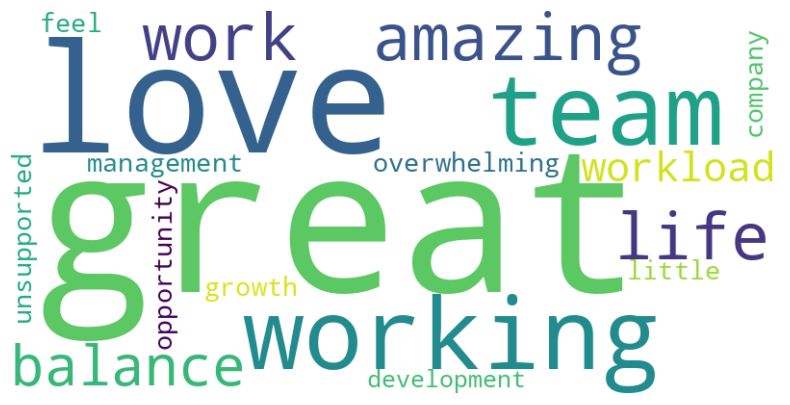

In [46]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Generate word cloud for the feedback
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(feedback_df['Employee_Feedback']))

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


In [57]:
# Load your attrition risk dataset (from Module 3)
attrition_df = pd.read_csv('preprocessed_employee_feedback.csv')  # ← Replace with actual filename


In [59]:
print(attrition_df.columns.tolist())


['Employee_Feedback', 'Sentiment_Polarity', 'Wellness_Category']


In [66]:
# Create Wellness Category based on sentiment polarity
def assign_wellness_category(polarity):
    if polarity >= 0.5:
        return 'Thriving'
    elif polarity >= 0:
        return 'Stable'
    else:
        return 'At Risk'

feedback_df['Wellness_Category'] = feedback_df['Sentiment_Polarity'].apply(assign_wellness_category)


In [62]:
print(feedback_df.columns.tolist())


['EmployeeNumber', 'Employee_Feedback', 'Sentiment_Polarity', 'TextBlob_Polarity']


In [63]:
feedback_df.columns = feedback_df.columns.str.strip()


<ipython-input-67-15fab878c7ed>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=feedback_df, x='Wellness_Category', palette='viridis')


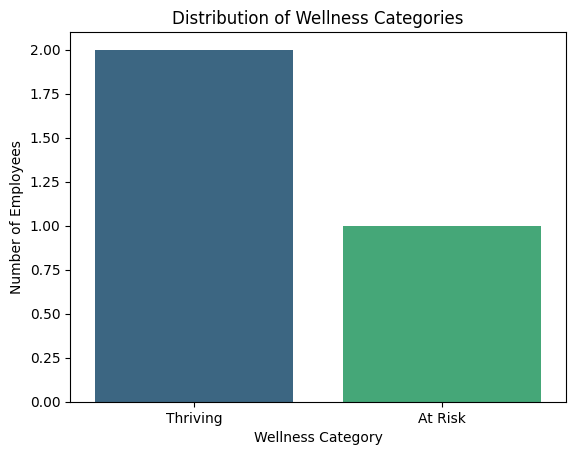

In [67]:
import seaborn as sns
import matplotlib.pyplot as plt

# Countplot
sns.countplot(data=feedback_df, x='Wellness_Category', palette='viridis')
plt.title("Distribution of Wellness Categories")
plt.xlabel("Wellness Category")
plt.ylabel("Number of Employees")
plt.show()


In [65]:
print(feedback_df.columns.tolist())


['EmployeeNumber', 'Employee_Feedback', 'Sentiment_Polarity', 'TextBlob_Polarity']


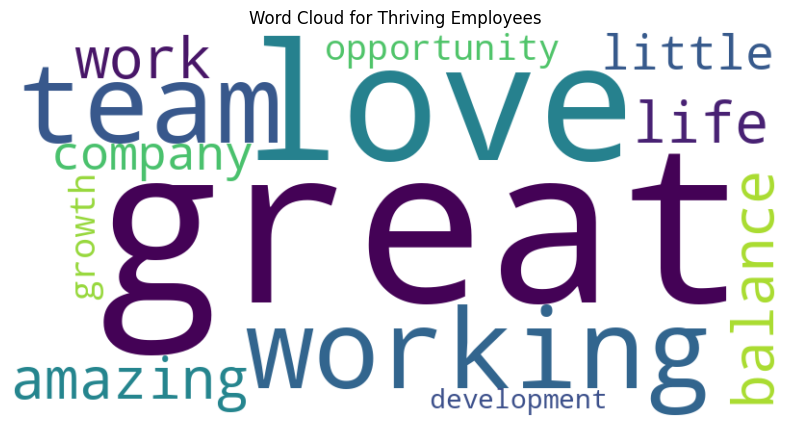

⚠️ No feedback available for Stable category.


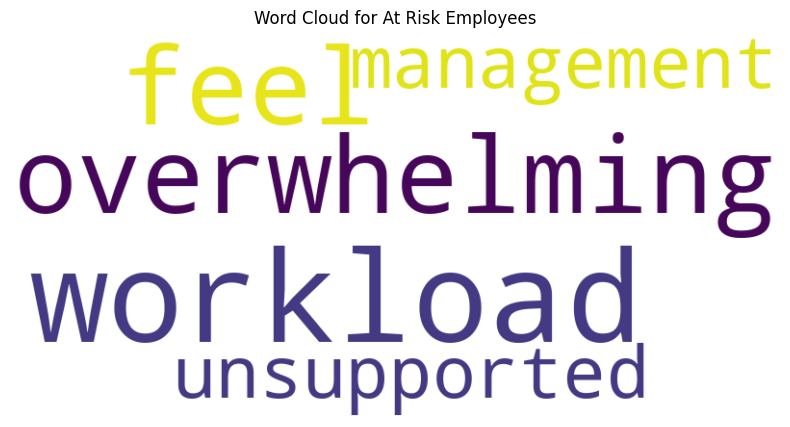

In [70]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Generate WordCloud for each wellness category if feedback exists
for category in ['Thriving', 'Stable', 'At Risk']:
    cat_feedback = feedback_df[feedback_df['Wellness_Category'] == category]['Employee_Feedback'].dropna()

    if len(cat_feedback) > 0:  # Check if there is any feedback
        text = " ".join(cat_feedback)
        wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

        plt.figure(figsize=(10, 5))
        plt.imshow(wordcloud, interpolation="bilinear")
        plt.axis('off')
        plt.title(f"Word Cloud for {category} Employees")
        plt.show()
    else:
        print(f"⚠️ No feedback available for {category} category.")


In [69]:
# Sort by polarity to find most positive and negative per group
for category in ['Thriving', 'Stable', 'At Risk']:
    print(f"\n--- {category} Employees ---")
    top_comments = feedback_df[feedback_df['Wellness_Category'] == category] \
                    .sort_values(by='Sentiment_Polarity', ascending=False) \
                    .head(3)['Employee_Feedback']
    for i, comment in enumerate(top_comments, 1):
        print(f"{i}. {comment}")



--- Thriving Employees ---
1. I love working here, the team is amazing and the work-life balance is great!
2. Great company, but there's little opportunity for growth and development.

--- Stable Employees ---

--- At Risk Employees ---
1. The workload is overwhelming, and I feel unsupported by management.


In [71]:
# Check the count of records in each wellness category
feedback_counts = feedback_df['Wellness_Category'].value_counts()
print(feedback_counts)


Wellness_Category
Thriving    2
At Risk     1
Name: count, dtype: int64


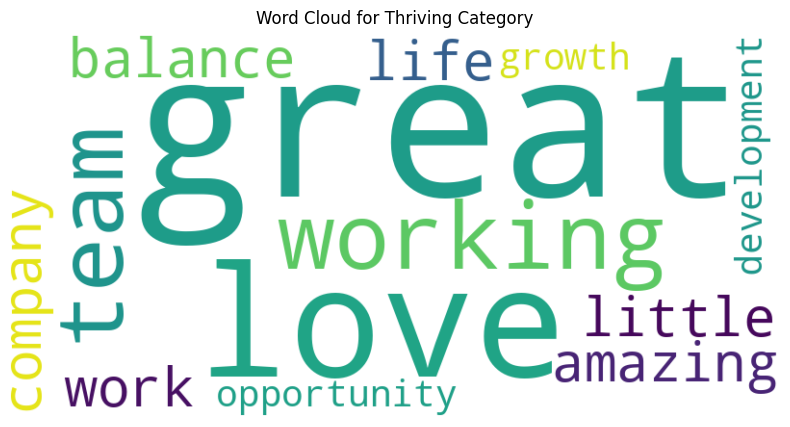

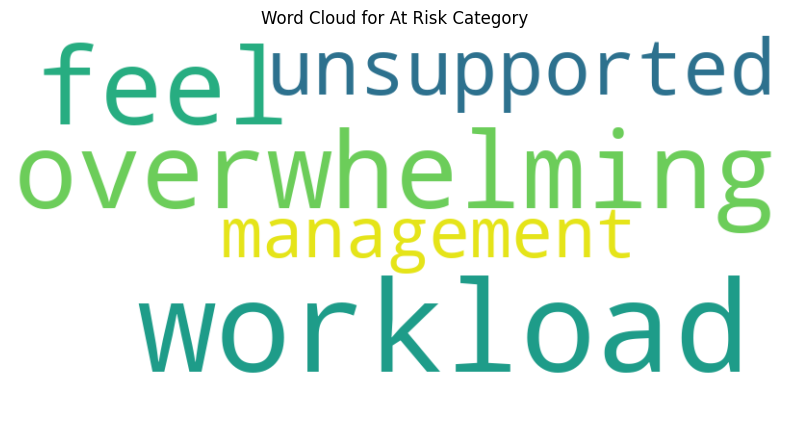

In [72]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Define the wellness categories you want to generate word clouds for
categories = ['Thriving', 'At Risk']

# Loop through the categories and generate word clouds
for category in categories:
    # Ensure there is data for the category
    if feedback_df[feedback_df['Wellness_Category'] == category].shape[0] > 0:
        text = " ".join(feedback_df[feedback_df['Wellness_Category'] == category]['Employee_Feedback'].dropna())
        wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

        # Display the word cloud
        plt.figure(figsize=(10, 5))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis('off')
        plt.title(f"Word Cloud for {category} Category")
        plt.show()
    else:
        print(f"⚠️ No feedback available for {category} category.")


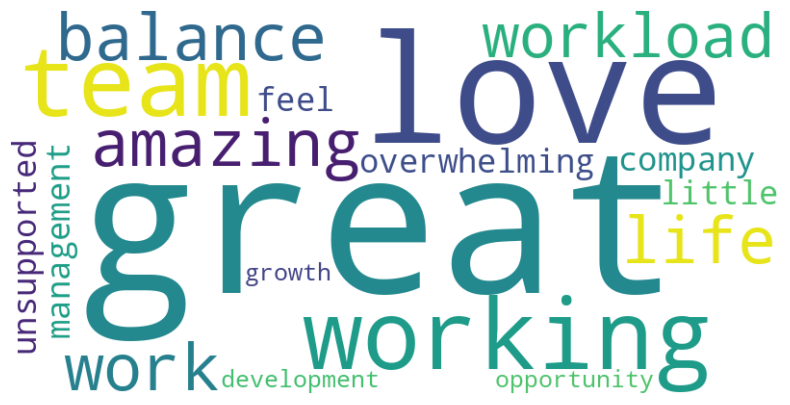

In [73]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Assuming feedback text is in a column 'Employee_Feedback'
text = ' '.join(merged_df['Employee_Feedback'].dropna())  # Join all feedback texts into one string

# Create the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Hide axis
plt.show()
